# Customer Churn Prediction using Machine Learning

Dataset yang digunakan merupakan dataset **DQLab Telco**

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
import pickle
from pathlib import Path

## Load Data

In [2]:
pd.options.display.max_columns = 50
df_load = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/dqlab_telco.csv')
df_load.shape

(7113, 22)

In [3]:
df_load.head()

,UpdatedAt,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,202006,45759018157,Female,0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,202006,45557574145,Male,0,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,202006,45366876421,Male,0,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,202006,45779536532,Male,0,No,No,45.0,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,202006,45923787906,Female,0,No,No,2.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df_load['customerID'].nunique

<bound method IndexOpsMixin.nunique of 0       45759018157
1       45557574145
2       45366876421
3       45779536532
4       45923787906
           ...     
7108    45117219093
7109    45564915800
7110    45655964195
7111    45899251814
7112    45427332508
Name: customerID, Length: 7113, dtype: object>

## Data Cleansing

### Filter customerID

Berikut merupakan kriteria customerID (phone number) yang benar:

* Panjang karakter adalah 11-12.
* Terdiri dari Angka Saja, tidak diperbolehkan ada karakter selain angka
* Diawali dengan angka 45 2 digit pertama.

In [5]:
df_load['valid_id'] = df_load['customerID'].astype(str).str.match(r'(45\d{9,10})')
df_load = (df_load[df_load['valid_id'] == True]).drop('valid_id', axis = 1)

In [6]:
df_load = df_load.sort_values('UpdatedAt', ascending = False).drop_duplicates('customerID')
print('Hasil jumlah ID Customer yang terfilter adalah',df_load['customerID'].count())

Hasil jumlah ID Customer yang terfilter adalah 6993


In [7]:
df_load['customerID'].is_unique

True

### Checking for Missing Values

In [8]:
df_load.isna().sum() 

UpdatedAt            0
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure              99
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges      26
TotalCharges        15
Churn               43
dtype: int64

#### Dropping all missing rows on column churn

In [9]:
df_load.dropna(subset=['Churn'], inplace=True)

#### Handling missing values with imputation

Diasumsikan data modeller meminta pengisian missing values dengan kriteria berikut:

* Tenure pihak data modeller meminta setiap rows yang memiliki missing values untuk Lama berlangganan di isi dengan 11
* Variable yang bersifat numeric selain Tenure di isi dengan median dari masing-masing variable tersebut

In [10]:
df_load['tenure'].fillna(11, inplace=True) 

list_collumns = ['MonthlyCharges', 'TotalCharges']
for column in list_collumns:
    median = df_load[column].median()
    df_load[column].fillna(median, inplace=True)
    
df_load.isna().sum() 

C:\Users\ACER\AppData\Local\Temp\ipykernel_10908\355556604.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_load['tenure'].fillna(11, inplace=True)
C:\Users\ACER\AppData\Local\Temp\ipykernel_10908\355556604.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when

UpdatedAt           0
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Find Outlier

Outlier atau pencilan dapat dideteksi dengan melihat Box Plot dari data

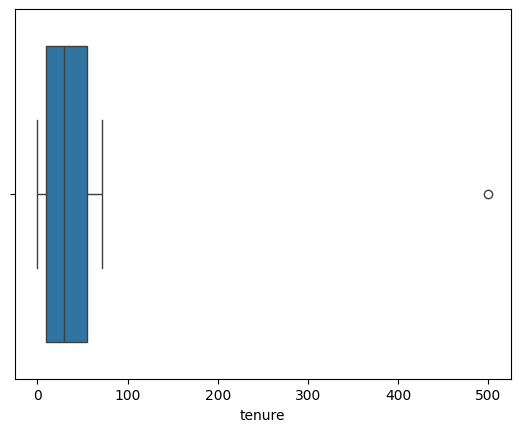

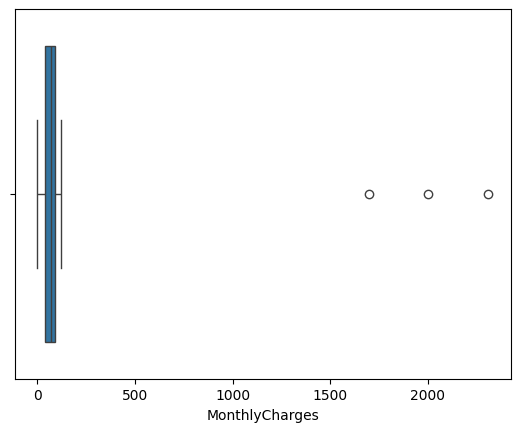

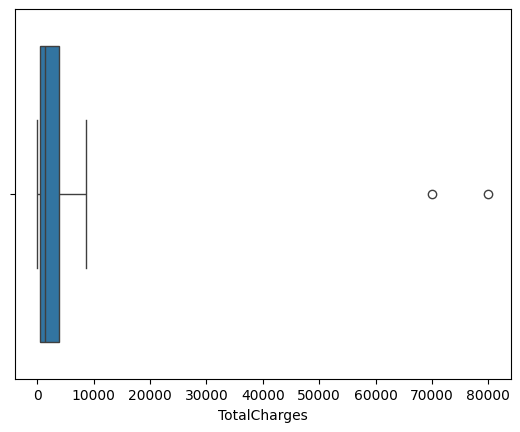

In [11]:
plt.figure()
sns.boxplot(x=df_load['tenure'])
plt.show()
plt.figure()
sns.boxplot(x=df_load['MonthlyCharges'])
plt.show()
plt.figure()
sns.boxplot(x=df_load['TotalCharges'])
plt.show()

#### Handling Outlier

Outlier dapat diatasi dengan menggunakan metode interquartile range (IQR)

In [12]:
Q1 = (df_load[['tenure', 'MonthlyCharges', 'TotalCharges']]).quantile(0.25)
Q3 = (df_load[['tenure', 'MonthlyCharges', 'TotalCharges']]).quantile(0.75)
IQR = Q3 - Q1

maximum = Q3 + (1.5*IQR)
minimum = Q1 - (1.5*IQR)


In [13]:
more_than = (df_load[['tenure', 'MonthlyCharges', 'TotalCharges']] > maximum)
lower_than = (df_load[['tenure', 'MonthlyCharges', 'TotalCharges']] < minimum)

In [14]:
df_load[['tenure', 'MonthlyCharges', 'TotalCharges']] = df_load[['tenure', 'MonthlyCharges', 'TotalCharges']].mask(more_than, maximum, axis=1)
df_load[['tenure', 'MonthlyCharges', 'TotalCharges']] = df_load[['tenure', 'MonthlyCharges', 'TotalCharges']].mask(lower_than, minimum, axis=1)

<Axes: xlabel='TotalCharges'>

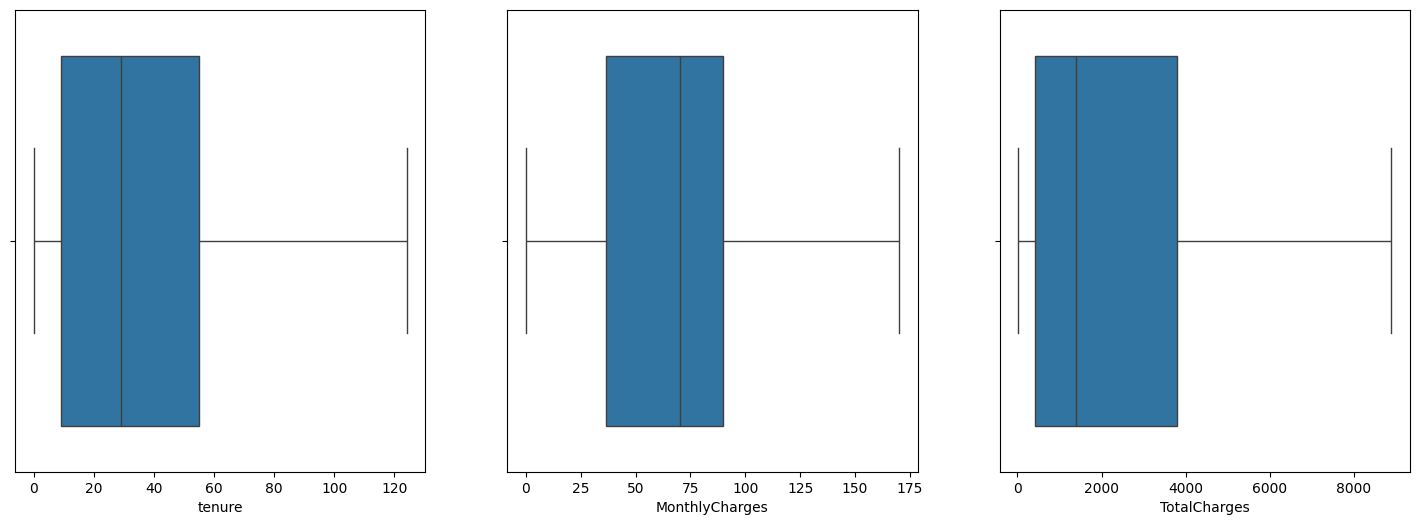

In [15]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
sns.boxplot(x=df_load['tenure'], ax=ax[0])
sns.boxplot(x=df_load['MonthlyCharges'], ax=ax[1])
sns.boxplot(x=df_load['TotalCharges'], ax=ax[2])

### Find Not Standard Values

In [16]:
df_load.head()

,UpdatedAt,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,202006,45759018157,Female,0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
4727,202006,45315483266,Male,0,Yes,No,60.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),20.50,1198.80,No
4738,202006,45236961615,Male,0,No,No,5.0,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,No,Mailed check,104.10,541.90,Yes
4737,202006,45929827382,Female,0,Yes,No,72.0,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),115.50,8312.75,No
4736,202006,45305082233,Female,0,Yes,Yes,56.0,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),81.25,4620.40,No


In [17]:
non_categorical_columns = ['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges']
for column in df_load.columns:
    if column not in non_categorical_columns:
        print('\nUniq Values Count variabel '+column)
        print(df_load[column].value_counts())


Uniq Values Count variabel UpdatedAt
UpdatedAt
202006    6950
Name: count, dtype: int64

Uniq Values Count variabel gender
gender
Male         3499
Female       3431
Wanita         14
Laki-Laki       6
Name: count, dtype: int64

Uniq Values Count variabel SeniorCitizen
SeniorCitizen
0    5822
1    1128
Name: count, dtype: int64

Uniq Values Count variabel Partner
Partner
No     3591
Yes    3359
Name: count, dtype: int64

Uniq Values Count variabel Dependents
Dependents
No     4870
Yes    2060
Iya      20
Name: count, dtype: int64

Uniq Values Count variabel PhoneService
PhoneService
Yes    6281
No      669
Name: count, dtype: int64

Uniq Values Count variabel MultipleLines
MultipleLines
No                  3346
Yes                 2935
No phone service     669
Name: count, dtype: int64

Uniq Values Count variabel InternetService
InternetService
Fiber optic    3057
DSL            2388
No             1505
Name: count, dtype: int64

Uniq Values Count variabel OnlineSecurity
OnlineSecurit

Terdapat beberapa nilai yang tidak strandar antara lain 'Wanita','Laki-Laki','Churn','Iya'. Nilai-nilai tersebut harus diubah menjadi 'Female','Male','Yes','Yes'

#### Handling Not Standard Values

In [18]:
df_load = df_load.replace(['Wanita','Laki-Laki','Churn','Iya'],['Female','Male','Yes','Yes'])

In [19]:
for col_name in list(['gender','Dependents','Churn']):
    print('\nUniq Values Count variabel '+column)
    print(df_load[col_name].value_counts())


Uniq Values Count variabel Churn
gender
Male      3505
Female    3445
Name: count, dtype: int64

Uniq Values Count variabel Churn
Dependents
No     4870
Yes    2080
Name: count, dtype: int64

Uniq Values Count variabel Churn
Churn
No     5114
Yes    1836
Name: count, dtype: int64


## Exploratory Data Analysis

### Percentege of Churn Customer

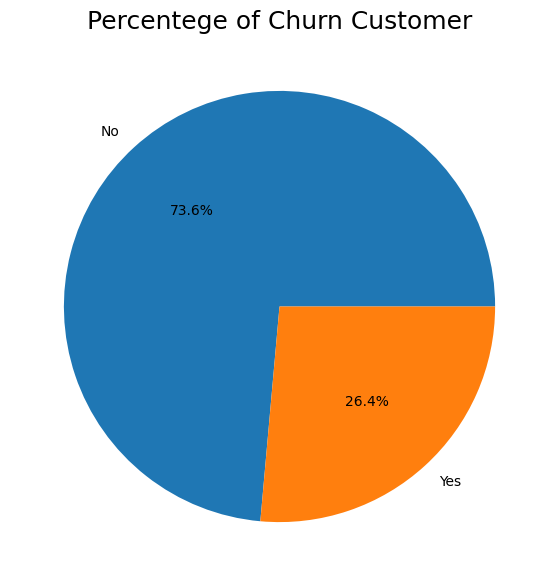

In [20]:
labels = ['No', 'Yes']
churn = df_load.Churn.value_counts()

plt.figure(figsize=(7,7))
plt.pie(churn, labels=labels, autopct='%1.1f%%')
plt.title('Percentege of Churn Customer', loc='center', fontsize=18)
plt.show()

Berdasarkan plot tersebut dapat kita ketahui bahwa dari keseluruhan customer terdapat 26.4% customer yang melakukan *churn*.

### Exploring Numerical Columns

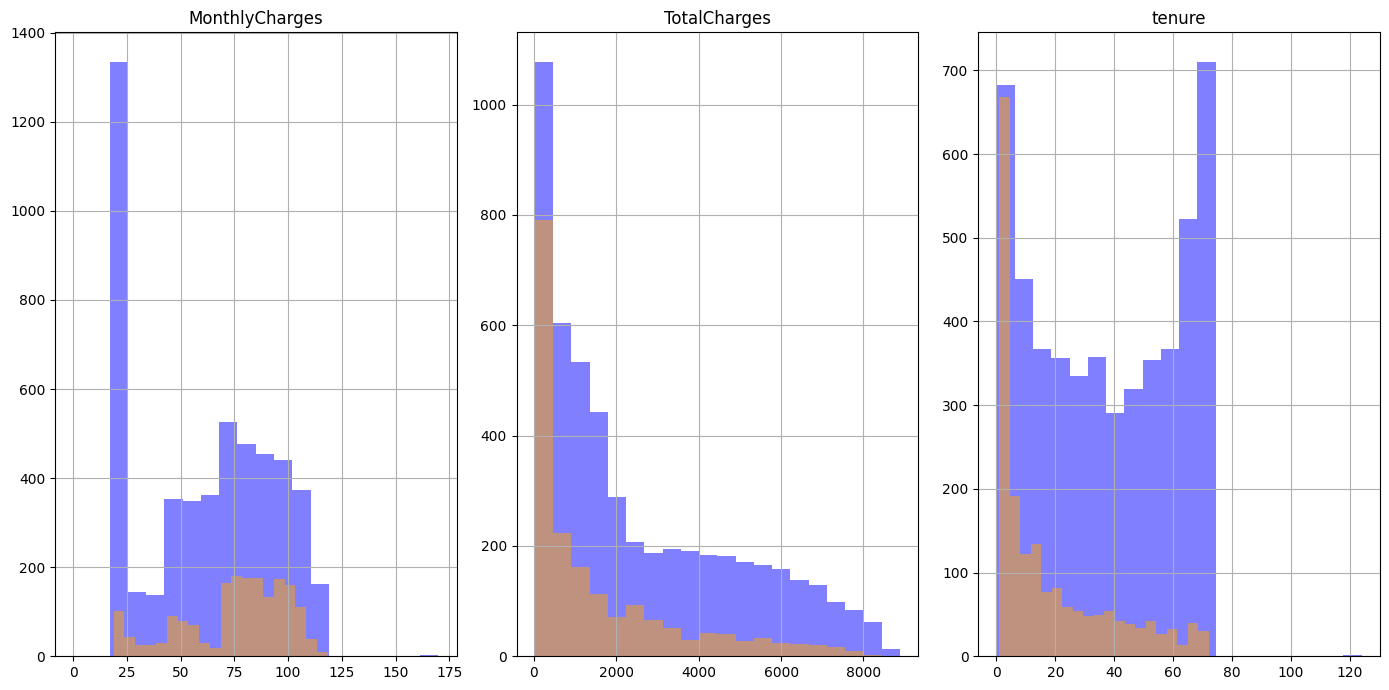

In [21]:
numerical_columns = ['MonthlyCharges','TotalCharges','tenure']
fig, ax = plt.subplots(1, 3, figsize=(14, 7))
df_load[df_load.Churn == 'No'][numerical_columns].hist(bins=20, 
                                                        color='blue', 
                                                        alpha=0.5, 
                                                        ax=ax)
df_load[df_load.Churn == 'Yes'][numerical_columns].hist(bins=20, 
                                                         color='orange', 
                                                         alpha=0.5, 
                                                         ax=ax)
plt.tight_layout()
plt.show()

* Berdasarkan plot **MonthlyCharges** dapat kita ketahui bahwa semakin kecil biaya bulanan yang dikenakan, semakin kecil juga kecenderungan untuk melakukan *churn*
* Berdasarkan plot **TotalCharges** dapat dilihat bahwa tidak ada kecenderungan apapun terhadap *churn*
* Berdasarkan plot **tenure** dapat kita ketahui bahwa ada kecenderungan semakin lama berlangganan, semakin kecil kecenderungan untuk melakukan *churn*

### Exploring Categorical Columns

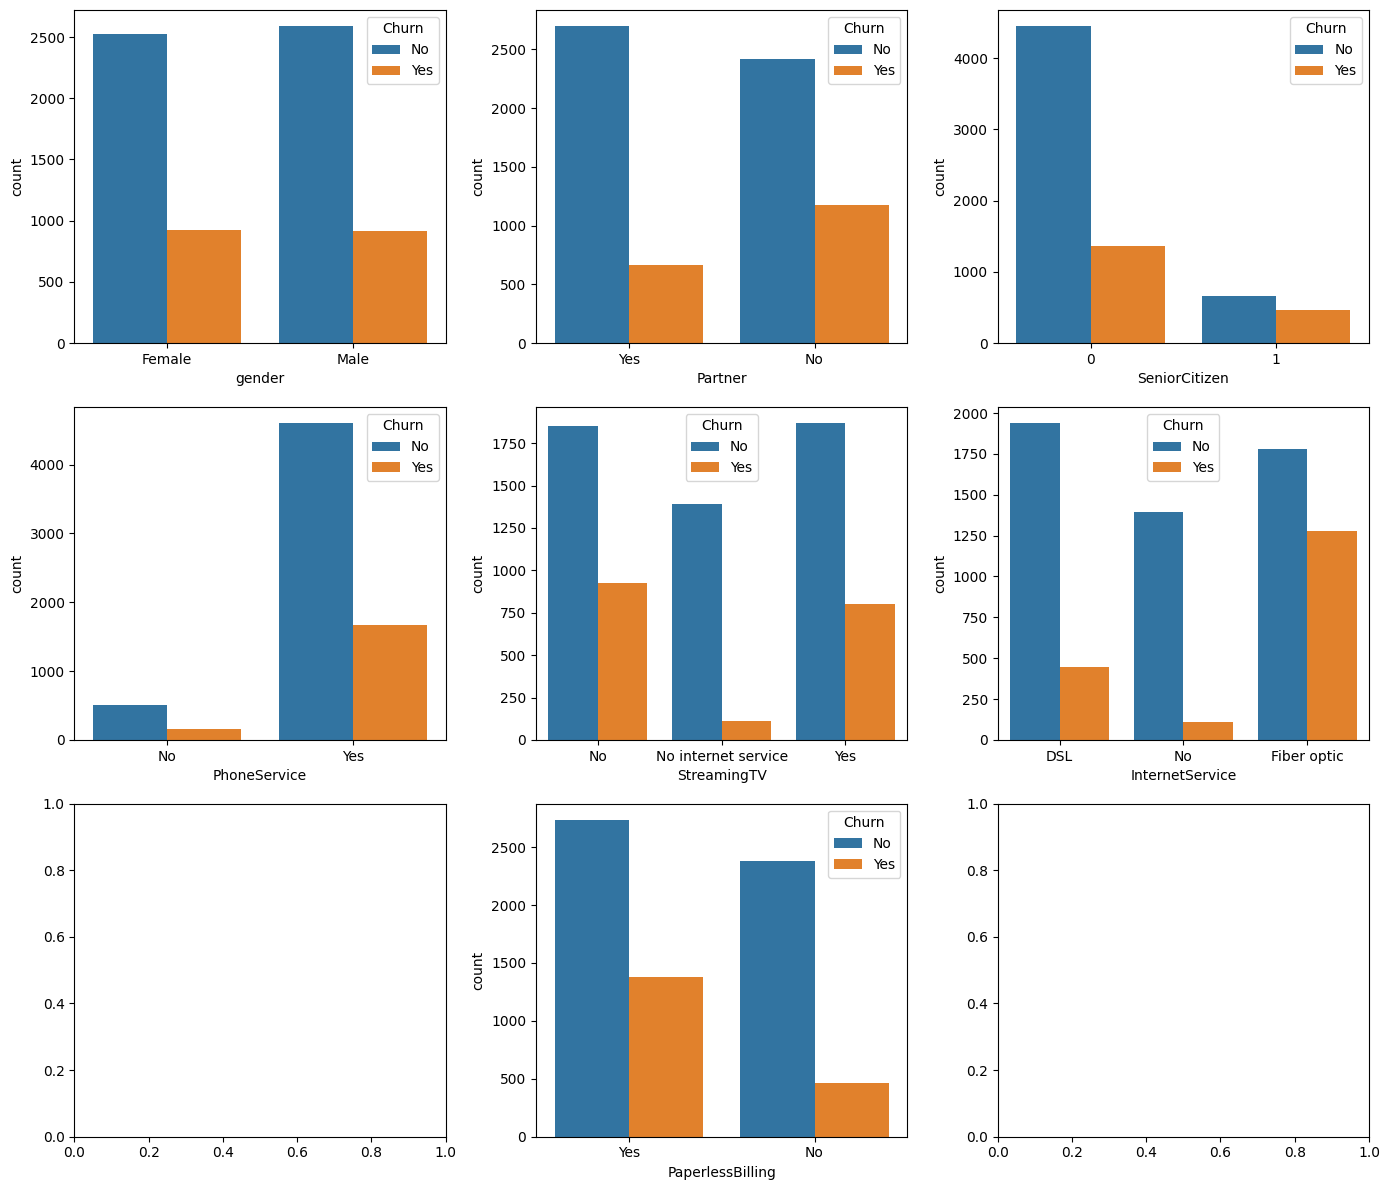

In [22]:
fig, ax = plt.subplots(3, 3, figsize=(14, 12))
sns.countplot(data=df_load, x='gender', hue='Churn', ax=ax[0][0])
sns.countplot(data=df_load, x='Partner', hue='Churn', ax=ax[0][1])
sns.countplot(data=df_load, x='SeniorCitizen', hue='Churn', ax=ax[0][2])
sns.countplot(data=df_load, x='PhoneService', hue='Churn', ax=ax[1][0])
sns.countplot(data=df_load, x='StreamingTV', hue='Churn', ax=ax[1][1])
sns.countplot(data=df_load, x='InternetService', hue='Churn', ax=ax[1][2])
sns.countplot(data=df_load, x='PaperlessBilling', hue='Churn', ax=ax[2][1])
plt.tight_layout()
plt.show()

* Tidak ada perbedaan signifikan untuk melakukan *churn* jika dilihat faktor jenis kelamin (**gender**) dan layanan telfonnya (**PhoneSevice**)
* Ada kecenderungan melakukan *churn* untuk customer dengan kategori berikut:
    * Tidak memiliki partner (**partner: No**)
    * Orang-orang yang statusnya adalah senior citizen (**SeniorCitizen: Yes**)
    * Orang-orang yang mempunyai layanan streaming TV (**StreamingTV: Yes**)
    * Orang-orang yang mempunyai layanan Internet (**InternetService: Yes**)
    * Orang-orang yang tagihannya paperless (**PaperlessBilling: Yes**)

## Data Preprocessing

### Removing Unnecessary Columns

In [23]:
cleaned_df = df_load.drop(['customerID', 'UpdatedAt'], axis=1)
cleaned_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
4727,Male,0,Yes,No,60.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),20.50,1198.80,No
4738,Male,0,No,No,5.0,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,No,Mailed check,104.10,541.90,Yes
4737,Female,0,Yes,No,72.0,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),115.50,8312.75,No
4736,Female,0,Yes,Yes,56.0,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),81.25,4620.40,No


### Encoding Data

In [24]:
LE = LabelEncoder()

for column in cleaned_df.columns:
    if cleaned_df[column].dtype == np.number:
        continue
    else:
        cleaned_df[column] = LE.fit_transform(cleaned_df[column])

cleaned_df.describe()

C:\Users\ACER\AppData\Local\Temp\ipykernel_10908\3974688484.py:4: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if cleaned_df[column].dtype == np.number:
C:\Users\ACER\AppData\Local\Temp\ipykernel_10908\3974688484.py:4: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if cleaned_df[column].dtype == np.number:
C:\Users\ACER\AppData\Local\Temp\ipykernel_10908\3974688484.py:4: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if cleaned_df[column].dtype == np.number:
C:\Users\ACER\AppData\Local\Temp\ipykernel_10908\3974688484.py:4: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000
mean,0.504317,0.162302,0.483309,0.299281,32.423165,0.903741,0.940863,0.872950,0.789496,0.907194,0.904604,0.796115,0.985180,0.992950,0.690216,0.591942,1.576403,64.992201,2286.058750,0.264173
std,0.500017,0.368754,0.499757,0.457976,24.581073,0.294967,0.948880,0.737618,0.859795,0.880313,0.880037,0.861389,0.885069,0.885165,0.833363,0.491509,1.067780,30.032040,2265.702553,0.440923
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,36.462500,406.975000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.450000,1400.850000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,3799.837500,1.000000
max,1.000000,1.000000,1.000000,1.000000,124.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,169.931250,8889.131250,1.000000


### Spliting Dataset

Dataset akan dibagi menjadi 70% training & 30% testing

In [25]:
X = cleaned_df.drop('Churn', axis=1)
y = cleaned_df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (4865, 19)
Shape of y_train: (4865,)
Shape of X_test: (2085, 19)
Shape of y_test: (2085,)


## Modelling

### Model: Logistic Regression

In [26]:
log_model = LogisticRegression()
log_model = log_model.fit(X_train, y_train)

y_pred_train = log_model.predict(X_train)
y_pred = log_model.predict(X_test)

c:\Users\ACER\anaconda3\envs\churn_prediction\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Model Performance

In [27]:
print('Classification Report Logistic Regression Model (Data Training) :')

acc = round(accuracy_score(y_pred_train, y_train), 3)
precision = round(precision_score(y_pred_train,  y_train), 3)
recall = round(recall_score(y_pred_train,  y_train), 3)
f1 = round(f1_score(y_pred_train,  y_train), 3)

print('Accuracy: ', acc)
print('Precesion: ', precision)
print('Recall: ', recall)
print('F1: ', f1)

Classification Report Logistic Regression Model (Data Training) :
Accuracy:  0.801
Precesion:  0.543
Recall:  0.65
F1:  0.592
